<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple and Multiple Linear Regression from Scratch

---

## Learning Objectives

### Core
- Code the MSE for regression
- Write a function to calculate the $R^2$ metric
- Evaluate a regression model with $R^2$
- Plot the regression line and predictions against the true values
- Understand the difference between multiple linear regression and simple linear regression
- Explain the 5 assumptions of MLR

### Target
- Conceptualise the difference between R^2 and MSE
- Construct an MLR, calculate the coefficients manually, and evaluate the R^2

### Stretch
- Derive the beta coefficients in MLR using linear algebra


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-2">Simple Linear Regression</a></span></li><li><span><a href="#Load-the-real-estate-data" data-toc-modified-id="Load-the-real-estate-data-3">Load the real estate data</a></span></li><li><span><a href="#Build-a-SLR:-estimating-price-with-sqft" data-toc-modified-id="Build-a-SLR:-estimating-price-with-sqft-4">Build a SLR: estimating <code>price</code> with <code>sqft</code></a></span><ul class="toc-item"><li><span><a href="#Define-the-target-and-predictor-variables" data-toc-modified-id="Define-the-target-and-predictor-variables-4.1">Define the target and predictor variables</a></span></li><li><span><a href="#Write-a-function-to-predict-$\hat{y}$-given-$x$" data-toc-modified-id="Write-a-function-to-predict-$\hat{y}$-given-$x$-4.2">Write a function to predict $\hat{y}$ given $x$</a></span></li><li><span><a href="#Write-a-function-to-plot-a-regression-line" data-toc-modified-id="Write-a-function-to-plot-a-regression-line-4.3">Write a function to plot a regression line</a></span></li><li><span><a href="#Write-a-function-to-calculate-the-predicted-values-for-the-training-data" data-toc-modified-id="Write-a-function-to-calculate-the-predicted-values-for-the-training-data-4.4">Write a function to calculate the predicted values for the training data</a></span></li><li><span><a href="#Write-a-function-to-calculate-residuals" data-toc-modified-id="Write-a-function-to-calculate-residuals-4.5">Write a function to calculate residuals</a></span></li><li><span><a href="#Write-a-function-to-calculate-the-mean-squared-error-(MSE)" data-toc-modified-id="Write-a-function-to-calculate-the-mean-squared-error-(MSE)-4.6">Write a function to calculate the mean squared error (MSE)</a></span></li><li><span><a href="#Write-a-function-to-calculate-$R^2$.-Print-out-the-$R^2$-of-your-model." data-toc-modified-id="Write-a-function-to-calculate-$R^2$.-Print-out-the-$R^2$-of-your-model.-4.7">Write a function to calculate $R^2$. Print out the $R^2$ of your model.</a></span></li></ul></li><li><span><a href="#From-simple-linear-regression-(SLR)-to-multiple-linear-regression-(MLR)" data-toc-modified-id="From-simple-linear-regression-(SLR)-to-multiple-linear-regression-(MLR)-5">From simple linear regression (SLR) to multiple linear regression (MLR)</a></span></li><li><span><a href="#Assumptions-of-MLR" data-toc-modified-id="Assumptions-of-MLR-6">Assumptions of MLR</a></span></li><li><span><a href="#Fitting-multiple-linear-regression" data-toc-modified-id="Fitting-multiple-linear-regression-7">Fitting multiple linear regression</a></span><ul class="toc-item"><li><span><a href="#Obtaining-the-$\beta$-coefficients" data-toc-modified-id="Obtaining-the-$\beta$-coefficients-7.1">Obtaining the $\beta$ coefficients</a></span></li><li><span><a href="#Code-MLR" data-toc-modified-id="Code-MLR-7.2">Code MLR</a></span></li><li><span><a href="#Solve-for-the-beta-coefficients" data-toc-modified-id="Solve-for-the-beta-coefficients-7.3">Solve for the beta coefficients</a></span></li><li><span><a href="#Confirm-that-these-betas-are-the-same-as-the-ones-using-scikit-learn" data-toc-modified-id="Confirm-that-these-betas-are-the-same-as-the-ones-using-scikit-learn-7.4">Confirm that these betas are the same as the ones using scikit-learn</a></span><ul class="toc-item"><li><span><a href="#Calculate-the-predicted-$\hat{y}$-with-your-$X$-predictor-matrix-and-$\beta$-coefficients." data-toc-modified-id="Calculate-the-predicted-$\hat{y}$-with-your-$X$-predictor-matrix-and-$\beta$-coefficients.-7.4.1">Calculate the predicted $\hat{y}$ with your $X$ predictor matrix and $\beta$ coefficients.</a></span></li><li><span><a href="#Calculate-the-$R^2$-of-the-multiple-regression-model." data-toc-modified-id="Calculate-the-$R^2$-of-the-multiple-regression-model.-7.4.2">Calculate the $R^2$ of the multiple regression model.</a></span></li><li><span><a href="#Check-the-distribution-of-the-residuals" data-toc-modified-id="Check-the-distribution-of-the-residuals-7.4.3">Check the distribution of the residuals</a></span></li><li><span><a href="#Check-for-relations-between-predictor-values-and-residuals" data-toc-modified-id="Check-for-relations-between-predictor-values-and-residuals-7.4.4">Check for relations between predictor values and residuals</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-7.5">Feature engineering</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8">Conclusions</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Simple Linear Regression

So far we have done simple linear regression fitting the outcome variable on a single predictor. To do so we used the following formulas for intercept and slope:

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$

Now we want to generalize to having more than one predictor.

## Load the real estate data

---

Over the course of this lesson we will be constructing a simple linear regression and then extend this to multiple linear regression. Included in the datasets folder is a very simple dataset on real estate prices.

**Load the data using pandas.**

In [3]:
house_csv = '../../../../resource-datasets/housing_data/housing-data.csv'
df = pd.read_csv(house_csv)
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


The columns are:

    sqft: the size of the house in sq. ft
    bdrms: number of bedrooms
    age: age in years of house
    price: the price of the house
    
**Convert `price` to be in units of 1000 (thousands of dollars).**

In [4]:
df['price'] = df.price.map(lambda x: x/1000.)
df.head(2)

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9


**Check that the data makes sense.**

In [5]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.00000
mean,2000.680851,3.170213,42.744681,340.41266
std,794.702354,0.760982,22.873440,125.03990
min,852.000000,1.000000,5.000000,169.90000
25%,1432.000000,3.000000,24.500000,249.90000
50%,1888.000000,3.000000,44.000000,299.90000
75%,2269.000000,4.000000,61.500000,384.45000
max,4478.000000,5.000000,79.000000,699.90000


In [6]:
df.corr()

,sqft,bdrms,age,price
sqft,1.000000,0.559967,0.079853,0.854988
bdrms,0.559967,1.000000,0.077486,0.442261
age,0.079853,0.077486,1.000000,0.051791
price,0.854988,0.442261,0.051791,1.000000


**Looking at the correlation, which variable is the most useful predictor for price?**

## Build a SLR: estimating `price` with `sqft`

---

We will start by constructing the simple linear regression. Below is the formulation for the SLR and our specific model of interest:

$$ y = \beta_0 + \beta_1 x + \epsilon \\
\text{price} = \beta_0 + \beta_1 \text{sqft} + \epsilon$$

> $\beta_0$: the intercept

Without the intercept term the regression line would always have to pass through the origin, which is almost never an optimal way to represent the relationship between our target and predictor variable.

> $\beta_1$: the coefficient on $x$ 

We intend to estimate the values of $y$ from $x$. Each value of $x$ is multiplied by the same coefficient, which is why linear regression models model a _linear_ relationship between our predictor and target variable.

Recall that a one-unit increase in $x$ will correspond to a $\beta_1$ unit increase in $y$ according to our model.

> $\epsilon_1$: the error (residuals)

This is the difference between the predicted and true values that are unexplained by $x$ in the regression.

---

### Define the target and predictor variables

Extract the target variable and predictor variable from our pandas dataframe. Classically, target and predictor are referred to as dependent and independent variables. There are many different terms for what $x$ and $y$ represent.

In [7]:
# target
price = df.price
# predictor
sqft = df.sqft

### Write a function to predict $\hat{y}$ given $x$

Build a function to represent the formula below:

$$\hat{y} = \beta_0 + \beta_1 x$$

**Note:** There is no error term in the equation. Obviously we do not know the error or we would be able to model $y$ perfectly. We can assume that our prediction $\hat{y}$ is an imperfect estimate of $y$.

In [8]:
def sls_fit_pd(df, X, Y):
    '''Takes a dataframe and the column names 
    refering to predictor and target variable,
    returns the regression coefficients beta_0 and beta_1.'''
    y_bar = df[Y].mean()
    x_bar = df[X].mean()
    std_y = df[Y].std()
    std_x = df[X].std()
    r_xy = df.corr().loc[X, Y]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1

In [9]:
beta_0, beta_1 = sls_fit_pd(df,'sqft','price')
beta_0, beta_1

(71.27049244872899, 0.1345252877202413)

### Write a function to plot a regression line

Your function should:
- Accept a dataframe and the column names of predictor and target variables as arguments and return the model coefficients.
- Calculate the predicted values $\hat{y}$ given $x$ (using the function you wrote above)
- Plot the original points
- Plot the predicted points (in a different color)
- Plot the regression line defined by the slope and intercept




In [10]:
def regression_plot(df,x,y):
    beta_0, beta_1 = sls_fit_pd(df, x, y)
    x_values = np.linspace(df[x].min(), df[x].max(), 100)
    y_values = beta_0 + beta_1*x_values

    fig, ax = plt.subplots()
    df.plot(x=x, y=y, kind='scatter', ax=ax, c='b')
    ax.plot(x_values, y_values, 'r--', alpha=0.7, lw=2, label='regression line')
    ax.legend()
    return fig, ax

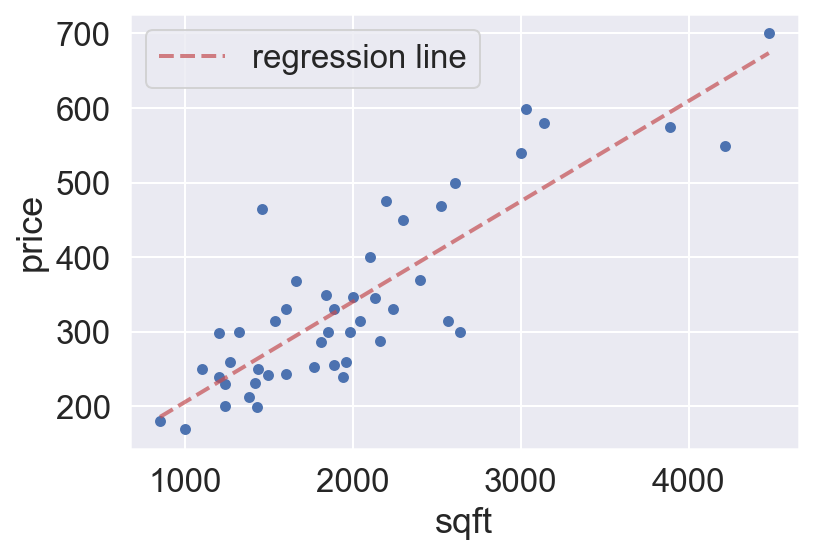

In [11]:
fig, ax = regression_plot(df,'sqft','price')

### Write a function to calculate the predicted values for the training data

In [12]:
def make_predictions(df, x, y):
    y_values = beta_0 + beta_1*df[x]
    return y_values

In [13]:
df['predictions'] = make_predictions(df,'sqft','price')

### Write a function to calculate residuals

Recall that the residuals are simply the error of the model:

$$ \text{residual}_i = y_i - \hat{y}_i$$

where $y_i$ is the true value of our target at this observation $i$, and $\hat{y}_i$ is the predicted value of our target. 

In [14]:
def calculate_residuals(df, x, y):
    residuals = df[y]-df[x]
    return residuals

In [15]:
df['residuals'] = calculate_residuals(df,'predictions','price')

### Write a function to calculate the mean squared error (MSE)

In [16]:
def mean_squared_error(residuals):
    return np.mean(residuals**2)

In [17]:
mean_squared_error(df.residuals)

4116.265480866084

### Write a function to calculate $R^2$. Print out the $R^2$ of your model.

In [18]:
def calculate_r2(y, yhat):
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r2 = 1-ss_res/ss_tot
    return r2

In [19]:
calculate_r2(df.price, df.predictions)

0.7310037839755306

In [20]:
calculate_r2(df.price, df.price.mean())

0.0

## From simple linear regression (SLR) to multiple linear regression (MLR)

---


> Instead of using just one predictor to estimate a continuous target, we build a model with multiple predictor variables. You will be using MLR way more than SLR going forward.

These variables will be represented as columns in a matrix (often a pandas dataframe).

**Brainstorm some examples of real-world scenarios where multiple predictors would be beneficial. Can you think of cases where it might be detrimental?**

> If Y is a function of multiple variables then it makes sense to expand the equation.  For example: predicting the weather tomorrow from pressure and temperature instead of just one of them.

> MLR could be detrimental if the predictors we are including aren't relevant. Why include predictors in our formula that do not have a real impact: more on this later!

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

The mnemonic LINEI is a useful way to remember these five assumptions.

## Fitting multiple linear regression

---

We extend the linear regression model by making predictions based on multiple predictors.
Each of the predictors has its own beta coefficient:

$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

Note that we could write the same relation as 

$$
\hat{y} = \beta_0\cdot 1 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

We could write this in compact matrix notation as

$$\hat{y} = X\beta$$

The first column of $X$ then contains a 1 in each row.

We will still determine the beta coefficients according to the ordinary least squared principle, i.e. by minimizing the sum of squared residuals.


### Obtaining the $\beta$ coefficients

$\beta$ is obtained with the linear algebra formula

$$ \beta = (X^T X)^{-1}X^T y $$

where $X^T$ is the transposed matrix of the original matrix $X$ and $(X^T X)^{-1}$ is the inverse matrix of $X^T X$.

Given the data matrix and the target variable, we can calculate the beta coefficients by forming a few dot-products.

### Code MLR

**First, we need to create the "design matrix" of our predictors.**

The first column will be a column of all 1s (the intercept) and the other columns will be `sqft`, `bdrms`, and `age`.

This is easiest to do with pandas: add a column for the intercept first, then extract the matrix using `.values`.

In [23]:
X = df[['sqft','bdrms','age']].copy()
X['intercept'] = 1
y = df.price
X.head()

,sqft,bdrms,age,intercept
0,2104,3,70,1
1,1600,3,28,1
2,2400,3,44,1
3,1416,2,49,1
4,3000,4,75,1


### Solve for the beta coefficients

We are still predicting `price`. Implement the linear algebra equation to solve for the beta coefficients. 

$$ \beta = (X^T X)^{-1}X^T y $$

**Tips:**

The transpose of a matrix is calculated by appending `.T` to the matrix:

    X.T

Matrix multiplication in the formula should be done with the "dot product":

    np.dot(mat1, mat2)

Inverting a matrix is done using:

    np.linalg.inv()

In [34]:
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
beta

array([ 1.39334847e-01, -8.62147046e+00, -8.12178776e-02,  9.24516278e+01])

#### Calculate the predicted $\hat{y}$ with your $X$ predictor matrix and $\beta$ coefficients.

In [35]:
df['predict'] = (beta[0]*df.sqft)+(beta[1]*df.bdrms)+(beta[2]*df.age)+beta[3]
df.head()

,sqft,bdrms,age,price,predictions,residuals,predict
0,2104,3,70,399.9,354.311698,45.588302,354.062483
1,1600,3,28,329.9,286.510953,43.389047,287.248871
2,2400,3,44,369.0,394.131183,-25.131183,397.417262
3,1416,2,49,232.0,261.758300,-29.758300,268.527154
4,3000,4,75,539.9,474.846356,65.053644,469.878945


#### Calculate the $R^2$ of the multiple regression model.

Use the function from above.

In [36]:
calculate_r2(df.price, df.predict)

0.7331639990690025

#### Check the distribution of the residuals

In [38]:
df['residuals'] = calculate_residuals(df, 'predict', 'price')
df.head()

,sqft,bdrms,age,price,predictions,residuals,predict
0,2104,3,70,399.9,354.311698,45.837517,354.062483
1,1600,3,28,329.9,286.510953,42.651129,287.248871
2,2400,3,44,369.0,394.131183,-28.417262,397.417262
3,1416,2,49,232.0,261.758300,-36.527154,268.527154
4,3000,4,75,539.9,474.846356,70.021055,469.878945


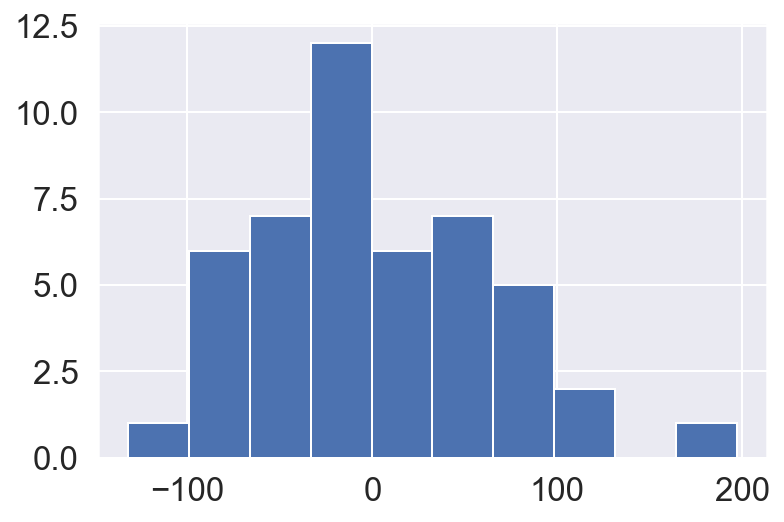

In [40]:
plt.hist(df.residuals);

#### Check for relations between predictor values and residuals

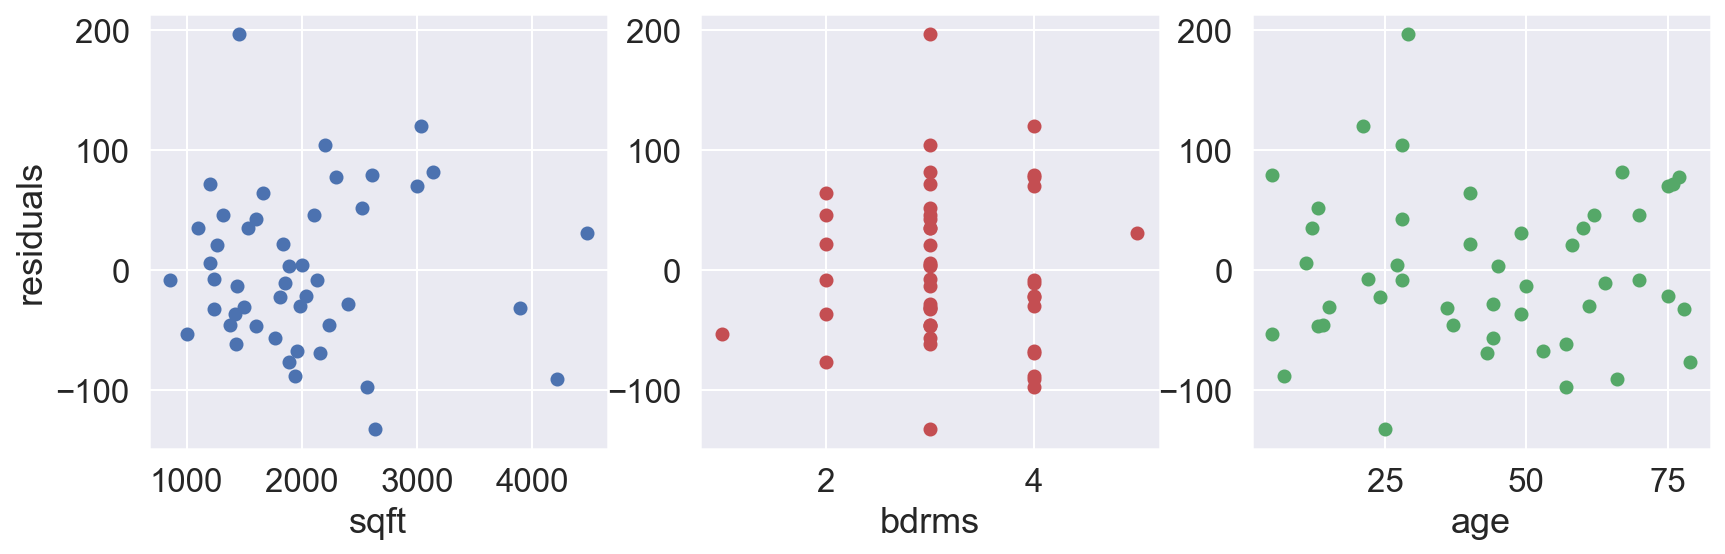

In [67]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4));

ax[0].scatter(x=df.sqft,y=df.residuals,c='b');
ax[1].scatter(x=df.bdrms,y=df.residuals,c='r');
ax[2].scatter(x=df.age,y=df.residuals,c='g');

ax[0].set_xlabel('sqft')
ax[0].set_ylabel('residuals')
ax[1].set_xlabel('bdrms')
ax[2].set_xlabel('age')

plt.show;

In [65]:
round(df.corr(),1)

,sqft,bdrms,age,price,predictions,residuals,predict
sqft,1.0,0.6,0.1,0.9,1.0,0.0,1.0
bdrms,0.6,1.0,0.1,0.4,0.6,0.0,0.5
age,0.1,0.1,1.0,0.1,0.1,0.0,0.1
price,0.9,0.4,0.1,1.0,0.9,0.5,0.9
predictions,1.0,0.6,0.1,0.9,1.0,0.0,1.0
residuals,0.0,0.0,0.0,0.5,0.0,1.0,0.0
predict,1.0,0.5,0.1,0.9,1.0,0.0,1.0


## Conclusions

- With MLR we can fit more complex models
- We can take more information into account
    - by including more predictors
    - by modeling more complicated relationships between target and predictor variables
- We implemented the relevant formulas by hand
- From now on we will rely on implementation in machine learning libraries